In [5]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
df = pd.concat(pd.read_csv(f,header=1,sep="\s+") for f in glob.glob("*/score.sc"))
print(df)

    SCORE:  total_score  atom_pair_constraint   cbeta  cenpack  \
0   SCORE:       82.370                   0.0  53.225   -0.225   
1   SCORE:       86.072                   0.0  52.959   -0.703   
2   SCORE:       82.205                   0.0  52.223   -1.390   
3   SCORE:       83.346                   0.0  53.005   -1.790   
4   SCORE:       81.202                   0.0  52.127   -2.771   
5   SCORE:       83.992                   0.0  52.422   -0.097   
6   SCORE:       80.987                   0.0  52.605   -1.370   
7   SCORE:       87.293                   0.0  52.704    1.591   
8   SCORE:       82.118                   0.0  52.883   -1.918   
9   SCORE:       84.475                   0.0  52.951   -1.048   
10  SCORE:       87.627                   0.0  52.973    0.395   
11  SCORE:       85.756                   0.0  52.575   -0.879   
12  SCORE:       88.240                   0.0  52.779    0.343   
13  SCORE:       87.173                   0.0  53.200   -0.795   
14  SCORE:

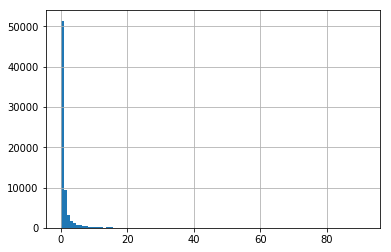

In [3]:
df["vdw"].hist(bins=100)

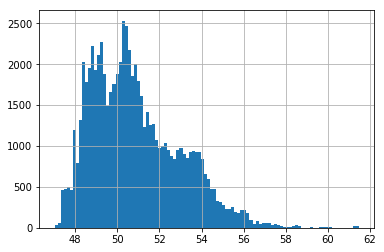

In [4]:
df["rg"].hist(bins=100)

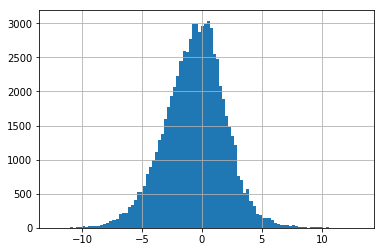

In [5]:
df["cenpack"].hist(bins=100)

In [3]:
df["scaffold"] = df["description"].str.split("_").str[0] + "_" + df["description"].str.split("_").str[1] + "_" + df["description"].str.split("_").str[2] + "_" + df["description"].str.split("_").str[3]


In [4]:
ddata = pd.concat(pd.read_pickle(f) for f in glob.glob("../hybrid_data_*2.pkl"))
print(ddata)

              description  rms_to_template            abego_loop  vdw_dimer
0      B_h_0001_0017_0001         0.435983  BBBAAABBBBAAAGBBBBAA   0.542030
1      B_h_0001_0017_0002         0.366253  BBBAAABBBBAAAGBBBBAA   0.542030
2      B_h_0001_0017_0003         0.169783  BBBAAABBBBAAAGBBBBAA   0.542030
3      B_h_0001_0017_0004         0.205891  BBBAAABBBBAAAGBBBBAA   0.542030
4      B_h_0001_0017_0005         0.262500  BBBAAABBBBAAAGBBBBAA   0.542030
5      B_h_0001_0017_0006         0.189150  BBBAAABBBBAAAGBBBBAA   0.542030
6      B_h_0001_0017_0007         0.230790  BBBAAABBBBAAAGBBBBAA   0.542030
7      B_h_0001_0017_0008         0.307711  BBBAAABBBBAAAGBBBBAA   0.542030
8      B_h_0001_0017_0009         0.194958  BBBAAABBBBAAAGBBBBAA   0.614531
9      B_h_0001_0017_0010         0.241155  BBBAAABBBBAAAGBBBBAB   0.548704
10     B_h_0001_0017_0011         0.142456  BBBAAABBBBAAAGBBBBAA   0.542030
11     B_h_0001_0017_0012         0.389443  BBBAAABBBBAAAGBBBBAA   0.542030
12     B_h_0

In [8]:
ddata["cis_pro"] = ddata["abego_loop"].str.findall("O")
print(ddata)

              description  rms_to_template            abego_loop  vdw_dimer  \
0      B_h_0001_0017_0001         0.435983  BBBAAABBBBAAAGBBBBAA   0.542030   
1      B_h_0001_0017_0002         0.366253  BBBAAABBBBAAAGBBBBAA   0.542030   
2      B_h_0001_0017_0003         0.169783  BBBAAABBBBAAAGBBBBAA   0.542030   
3      B_h_0001_0017_0004         0.205891  BBBAAABBBBAAAGBBBBAA   0.542030   
4      B_h_0001_0017_0005         0.262500  BBBAAABBBBAAAGBBBBAA   0.542030   
5      B_h_0001_0017_0006         0.189150  BBBAAABBBBAAAGBBBBAA   0.542030   
6      B_h_0001_0017_0007         0.230790  BBBAAABBBBAAAGBBBBAA   0.542030   
7      B_h_0001_0017_0008         0.307711  BBBAAABBBBAAAGBBBBAA   0.542030   
8      B_h_0001_0017_0009         0.194958  BBBAAABBBBAAAGBBBBAA   0.614531   
9      B_h_0001_0017_0010         0.241155  BBBAAABBBBAAAGBBBBAB   0.548704   
10     B_h_0001_0017_0011         0.142456  BBBAAABBBBAAAGBBBBAA   0.542030   
11     B_h_0001_0017_0012         0.389443  BBBAAABB

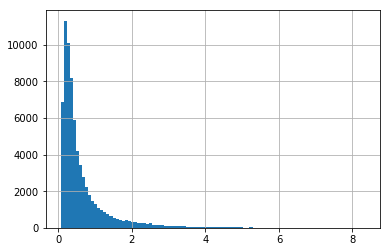

In [9]:
ddata["rms_to_template"].hist(bins=100)

In [10]:
dall = pd.merge(df, ddata, on='description')
print(dall)

       SCORE:  total_score  atom_pair_constraint   cbeta  cenpack  \
0      SCORE:       82.370                   0.0  53.225   -0.225   
1      SCORE:       86.072                   0.0  52.959   -0.703   
2      SCORE:       82.205                   0.0  52.223   -1.390   
3      SCORE:       83.346                   0.0  53.005   -1.790   
4      SCORE:       81.202                   0.0  52.127   -2.771   
5      SCORE:       83.992                   0.0  52.422   -0.097   
6      SCORE:       80.987                   0.0  52.605   -1.370   
7      SCORE:       87.293                   0.0  52.704    1.591   
8      SCORE:       82.118                   0.0  52.883   -1.918   
9      SCORE:       84.475                   0.0  52.951   -1.048   
10     SCORE:       87.627                   0.0  52.973    0.395   
11     SCORE:       85.756                   0.0  52.575   -0.879   
12     SCORE:       88.240                   0.0  52.779    0.343   
13     SCORE:       87.173        

In [11]:
average_dall = dall.groupby(by="scaffold").mean()
std_dall = dall.groupby(by="scaffold").std()

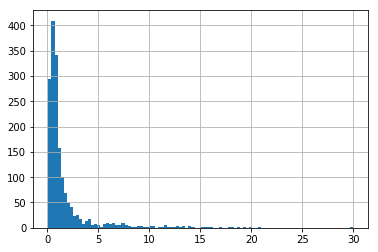

In [12]:
average_dall["vdw"].hist(bins=100)

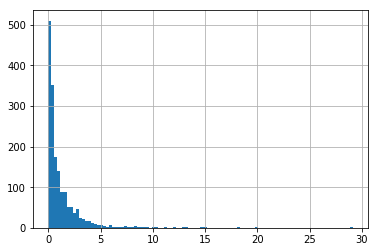

In [13]:
std_dall["vdw"].hist(bins=100)

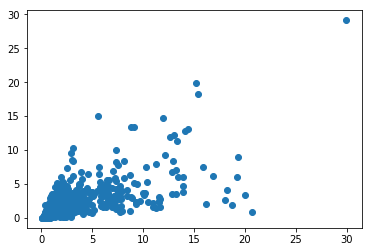

In [14]:
plt.scatter(average_dall["vdw"],std_dall["vdw"])

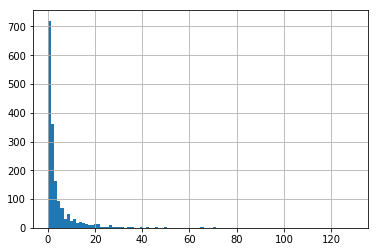

In [15]:
average_dall["vdw_dimer"].hist(bins=100)

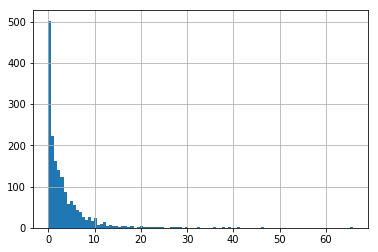

In [16]:
std_dall["vdw_dimer"].hist(bins=100)

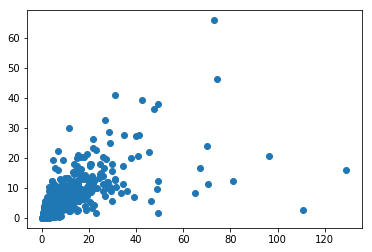

In [14]:
plt.scatter(average_dall["vdw_dimer"],std_dall["vdw_dimer"])

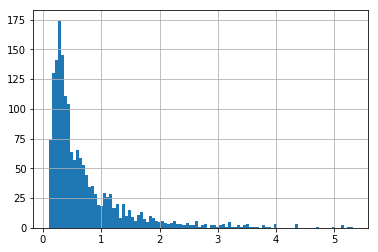

In [18]:
average_dall["rms_to_template"].hist(bins=100)

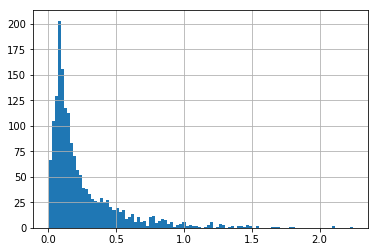

In [19]:
std_dall["rms_to_template"].hist(bins=100)

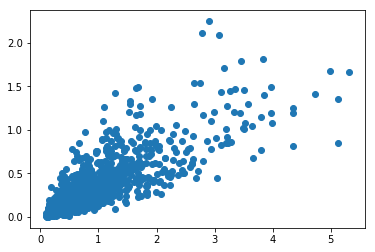

In [15]:
plt.scatter(average_dall["rms_to_template"],std_dall["rms_to_template"])

In [16]:
average_rms = average_dall.loc[average_dall["rms_to_template"] < 1.5].index.tolist()
print(average_rms)

['A_b_0001_0034', 'A_b_0001_0039', 'A_b_0001_0047', 'A_b_0001_0053', 'A_b_0001_0056', 'A_b_0001_0058', 'A_b_0001_0059', 'A_b_0001_0065', 'A_b_0001_0066', 'A_b_0001_0069', 'A_b_0001_0072', 'A_b_0001_0082', 'A_b_0001_0119', 'A_b_0001_0127', 'A_c_0001_0017', 'A_c_0001_0033', 'A_c_0001_0034', 'A_c_0001_0036', 'A_c_0001_0037', 'A_c_0001_0043', 'A_c_0001_0046', 'A_c_0001_0055', 'A_c_0001_0056', 'A_c_0001_0057', 'A_c_0001_0059', 'A_c_0001_0060', 'A_c_0001_0062', 'A_c_0001_0064', 'A_c_0001_0066', 'A_c_0001_0067', 'A_c_0001_0072', 'A_c_0001_0073', 'A_c_0001_0074', 'A_c_0001_0075', 'A_c_0001_0076', 'A_c_0001_0084', 'A_c_0001_0085', 'A_c_0001_0087', 'A_c_0001_0092', 'A_c_0001_0094', 'A_c_0001_0096', 'A_c_0001_0103', 'A_c_0001_0113', 'A_c_0001_0136', 'A_c_0001_0139', 'A_c_0001_0146', 'A_c_0001_0149', 'A_c_0001_0159', 'A_d_0001_0026', 'A_d_0001_0051', 'A_d_0001_0053', 'A_e_0001_0014', 'A_e_0001_0015', 'A_e_0001_0032', 'A_e_0001_0033', 'A_e_0001_0034', 'A_e_0001_0040', 'A_e_0001_0045', 'A_e_0001_005

In [17]:
std_rms = std_dall.loc[std_dall["rms_to_template"] < 0.75].index.tolist()
print(std_rms)

['A_b_0001_0034', 'A_b_0001_0039', 'A_b_0001_0047', 'A_b_0001_0053', 'A_b_0001_0056', 'A_b_0001_0058', 'A_b_0001_0059', 'A_b_0001_0065', 'A_b_0001_0066', 'A_b_0001_0069', 'A_b_0001_0072', 'A_b_0001_0082', 'A_b_0001_0119', 'A_b_0001_0127', 'A_c_0001_0017', 'A_c_0001_0033', 'A_c_0001_0034', 'A_c_0001_0036', 'A_c_0001_0037', 'A_c_0001_0043', 'A_c_0001_0046', 'A_c_0001_0055', 'A_c_0001_0056', 'A_c_0001_0057', 'A_c_0001_0059', 'A_c_0001_0060', 'A_c_0001_0062', 'A_c_0001_0064', 'A_c_0001_0066', 'A_c_0001_0067', 'A_c_0001_0072', 'A_c_0001_0073', 'A_c_0001_0074', 'A_c_0001_0075', 'A_c_0001_0076', 'A_c_0001_0084', 'A_c_0001_0085', 'A_c_0001_0087', 'A_c_0001_0092', 'A_c_0001_0094', 'A_c_0001_0096', 'A_c_0001_0103', 'A_c_0001_0113', 'A_c_0001_0136', 'A_c_0001_0139', 'A_c_0001_0146', 'A_c_0001_0149', 'A_c_0001_0159', 'A_d_0001_0026', 'A_d_0001_0051', 'A_d_0001_0053', 'A_e_0001_0014', 'A_e_0001_0015', 'A_e_0001_0032', 'A_e_0001_0033', 'A_e_0001_0034', 'A_e_0001_0040', 'A_e_0001_0045', 'A_e_0001_005

In [18]:
good_rms = list(set(average_rms) & set(std_rms))

In [19]:
df_good_rms = dall.loc[dall["scaffold"].isin(good_rms)]
print(df_good_rms.shape)

(63617, 21)


In [20]:
df_good_monomer = df_good_rms.loc[(df_good_rms["chainbreak_posthyb"]==0.0) & (df_good_rms["vdw"] < 1.0)]
print(df_good_monomer.shape)

(30504, 21)


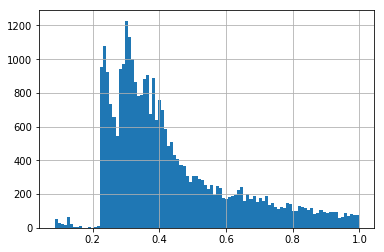

In [21]:
df_good_monomer["vdw"].hist(bins=100)

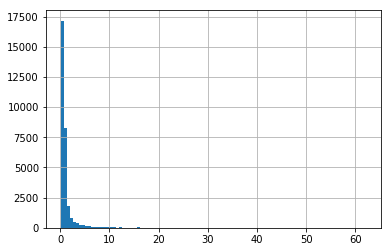

In [57]:
df_good_monomer["vdw_dimer"].hist(bins=100)

In [22]:
df_good_dimer = df_good_monomer.loc[(df_good_monomer["vdw_dimer"]<2.0)]
print(df_good_dimer.shape)

(27185, 21)


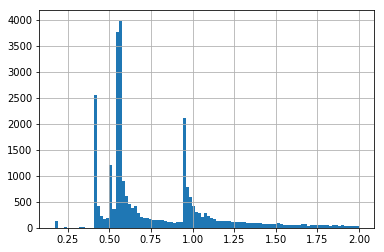

In [23]:
df_good_dimer["vdw_dimer"].hist(bins=100)

In [28]:
print(df_good_dimer)

       SCORE:  total_score  atom_pair_constraint   cbeta  cenpack  \
1      SCORE:       86.072                   0.0  52.959   -0.703   
81     SCORE:       89.960                   0.0  48.531   -0.431   
82     SCORE:       93.200                   0.0  48.654    2.755   
83     SCORE:       89.411                   0.0  48.916    2.021   
84     SCORE:       86.264                   0.0  48.927    1.747   
85     SCORE:       91.389                   0.0  48.940    0.120   
86     SCORE:       86.534                   0.0  48.505    0.686   
87     SCORE:       97.154                   0.0  49.052    2.013   
88     SCORE:       91.580                   0.0  48.342    0.764   
89     SCORE:       88.209                   0.0  48.291    1.510   
91     SCORE:       90.880                   0.0  48.192    2.567   
92     SCORE:       91.290                   0.0  48.247    1.211   
95     SCORE:       87.558                   0.0  48.577    1.095   
96     SCORE:       87.148        

In [38]:
df_no_cis = df_good_dimer.loc[(df_good_dimer.cis_pro.map(len) == 0) & (df_good_dimer["rms_to_template"] < 1.5 ) ]
print(df_no_cis.shape)

(22312, 21)


In [39]:
print(df_no_cis.groupby(by="scaffold").mean())

                    total_score  atom_pair_constraint      cbeta   cenpack  \
scaffold                                                                     
A_b_0001_0034         79.271200                   0.0  47.508333 -3.219233   
A_b_0001_0039         81.636250                   0.0  48.989909 -1.476659   
A_b_0001_0047         74.096947                   0.0  52.645474 -6.746842   
A_b_0001_0053         79.352780                   0.0  48.070732 -0.506878   
A_b_0001_0056         82.555580                   0.0  46.961740 -0.914300   
A_b_0001_0058         84.266939                   0.0  51.177714 -3.670102   
A_b_0001_0059         89.127340                   0.0  50.945560 -3.273520   
A_b_0001_0066         78.902128                   0.0  50.028846 -3.524949   
A_b_0001_0069         86.591636                   0.0  52.679432 -3.413591   
A_b_0001_0072         86.491211                   0.0  52.878474 -3.987316   
A_b_0001_0082         81.311000                   0.0  52.607161

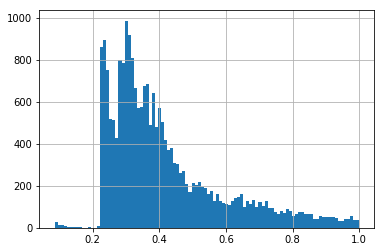

In [40]:
df_no_cis["vdw"].hist(bins=100)

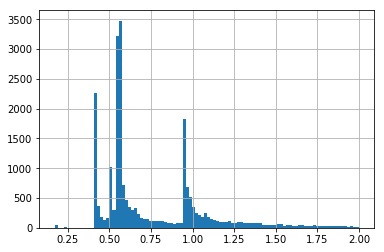

In [41]:
df_no_cis["vdw_dimer"].hist(bins=100)

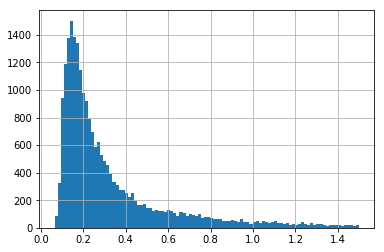

In [42]:
df_no_cis["rms_to_template"].hist(bins=100)

In [46]:
with open("../strep_design_loops_round1/task_list",'w') as task_file:
    for index,row in df_no_cis.iterrows():
        folder = row["scaffold"]
        pdb_name = row["description"]
        task_file.write(pdb_name+"\n")
        new_pdb = "../strep_design_loops_round1/"+pdb_name+".pdb"
        pdb_loop = folder+"/"+pdb_name+".pdb"
        template_pdb = folder+"/"+folder+".pdb"
        with open(new_pdb,"w") as out_pdb:
            with open(pdb_loop,'r') as in_pdb:
                for line in in_pdb:
                    if line.startswith("ATOM"):
                        out_pdb.write(line)
            with open(template_pdb,'r') as template:
                for line in template:
                    if line.startswith("HETATM"):
                        out_pdb.write(line)
                    elif "REMARK PDBinfo-LABEL:" in line and line.split()[3] == "segment_lookup":
                        out_pdb.write(line)

In [60]:
all_scaffolds = df_no_cis.groupby(by="scaffold").size().index.tolist()


In [61]:
with open("../picked_scaffolds","w") as task_file:
    for item in all_scaffolds:
        task_file.write(item+".pdb\n")
